# Pisa 2012 Data Exploration
### by Gabriela Sikora

## Preliminary Wrangling

> Briefly introduce your dataset here.




> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

    PISA Data Dictionary
    The data and topics of investigation come from the PISA Data Visualization Competition. For inspiration and examples, see the winners and submissions here. If you want to know more about the survey design, the details can be found in the technical report here.

	

How does the choice of school play into academic performance?

Are there differences in achievement based on gender, location, or student attitudes?

Are there differences in achievement based on teacher practices and attitudes?

Does there exist inequality in academic achievement?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
pisa = pd.read_csv('pisa_df.csv')

In [3]:
pisa.shape

(45758, 19)

In [4]:
pisa.dtypes

Student ID                                               int64
Gender                                                  object
How many books at home                                  object
Out-of-School Study Time - Homework                    float64
Out-of-School Study Time - Guided Homework             float64
Out-of-School Study Time - Personal Tutor              float64
Out-of-School Study Time - Commercial Company          float64
Out-of-School Study Time - With Parent                 float64
Learning time (minutes per week)- <Mathematics>        float64
Learning time (minutes per week)  - <test language>    float64
Learning time (minutes per week) - <Science>           float64
Average Math Score                                     float64
Average Reading Score                                  float64
Average Science Score                                  float64
Average Total Score                                    float64
Education - Father                                     

In [5]:
pisa.duplicated().sum()

2175

In [6]:
pisa.sample(10)

,Student ID,Gender,How many books at home,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning time (minutes per week)- <Mathematics>,Learning time (minutes per week) - <test language>,Learning time (minutes per week) - <Science>,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning time (minutes per week) - Total
42012,1199,Female,201-500 books,21.0,0.0,2.0,2.0,2.0,175.0,140.0,140.0,473.36812,565.31446,513.74488,675.265193,<ISCED level 5>,<ISCED level 5>,27.0,455.0
31612,4788,Female,More than 500 books,2.0,1.0,0.0,0.0,0.0,180.0,180.0,180.0,602.04862,637.83500,632.07760,824.669947,<ISCED level 6>,<ISCED level 5>,3.0,540.0
36882,6116,Male,11-25 books,3.0,0.0,2.0,4.0,0.0,250.0,250.0,300.0,508.96558,521.88758,497.70610,679.174947,<ISCED level 6>,<ISCED level 5>,9.0,800.0
21957,7713,Male,26-100 books,15.0,0.0,0.0,2.0,0.0,360.0,180.0,360.0,757.99188,686.84770,699.30998,967.380480,<ISCED level 5>,<ISCED level 3>,17.0,900.0
31333,2534,Female,More than 500 books,8.0,0.0,0.0,0.0,0.0,270.0,270.0,270.0,589.97508,678.58310,634.22230,830.918520,<ISCED level 6>,<ISCED level 5>,8.0,810.0
34872,23486,Female,101-200 books,17.0,0.0,1.0,2.0,0.0,300.0,240.0,180.0,677.83922,645.30150,653.99106,884.990333,<ISCED level 5>,<ISCED level 5>,20.0,720.0
21307,2035,Male,101-200 books,12.0,1.0,1.0,0.0,1.0,200.0,200.0,160.0,622.76836,678.42728,656.13578,860.033260,<ISCED level 5>,<ISCED level 3>,15.0,560.0
12867,2515,Male,11-25 books,1.0,0.0,0.0,0.0,0.0,200.0,150.0,150.0,337.67724,319.31624,355.59492,450.088547,<ISCED level 5>,<ISCED level 3>,1.0,500.0
45699,11754,Female,101-200 books,2.0,1.0,0.0,1.0,1.0,450.0,450.0,450.0,569.80058,564.67902,574.72956,759.669913,<ISCED level 6>,<ISCED level 6>,5.0,1350.0
23033,8147,Female,More than 500 books,10.0,2.0,2.0,2.0,0.0,275.0,220.0,110.0,535.60522,549.90486,555.89332,725.669540,<ISCED level 5>,<ISCED level 3>,16.0,605.0


In [7]:
pisa['How many books at home'].value_counts()

26-100 books           12436
101-200 books           9409
201-500 books           8934
More than 500 books     6018
11-25 books             5504
0-10 books              3457
Name: How many books at home, dtype: int64

In [8]:
pisa['Education - Father'].value_counts()

<ISCED level 5>    19974
<ISCED level 6>    13285
<ISCED level 3>     4395
<ISCED level 4>     4024
<ISCED level 2>     3291
<ISCED level 1>      624
<ISCED level 0>      165
Name: Education - Father, dtype: int64

In [9]:
pisa['Education - Mother'].value_counts()

<ISCED level 3>    19231
<ISCED level 5>    14533
<ISCED level 4>     5094
<ISCED level 2>     3605
<ISCED level 6>     2611
<ISCED level 1>      532
<ISCED level 0>      152
Name: Education - Mother, dtype: int64

In [10]:
pisa['How many books at home'] = pisa['How many books at home'].astype('str')


In [11]:
pisa['How many books at home'] = pisa['How many books at home'].astype('category')

# pisa['How many books at home'] = pisa['How many books at home'].cat.set_categories(['0-10 books','11-25 books','26-100 books','101-200 books','201-500 books', 'More than 500 books'], ordered=True)
pisa.sort_values(['How many books at home'], inplace=True)


In [12]:
# # # convert books at home, and parental level of education into ordered categorical types
ordinal_var_dict = {'How many books at home': ['0-10 books','11-25 books','26-100 books','101-200 books','201-500 books', 'More than 500 books'],
                    'Education - Father': ['<ISCED level 0>', '<ISCED level 1>', '<ISCED level 2>', '<ISCED level 3>', '<ISCED level 4>', '<ISCED level 5>', '<ISCED level 6>'],
                    'Education - Mother': ['<ISCED level 0>', '<ISCED level 1>', '<ISCED level 2>', '<ISCED level 3>', '<ISCED level 4>', '<ISCED level 5>', '<ISCED level 6>']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)
    

In [13]:
# # books = ['0-10 books','11-25 books','26-100 books','101-200 books','201-500 books', 'More than 500 books']
# # book_amounts = pd.api.types.CategoricalDtype(ordered = True, categories = books)
# # pisa['How many books at home'] = pisa['How many books at home'].astype(book_amounts);

# books = ['0-10 books', '11-25 books', '26-100 books', '101-200 books', '201-500 books', 'More than 500 books']
# covered_type = pd.api.types.CategoricalDtype(categories=books, ordered=True)
# pisa['How many books at home'] = pisa['How many books at home'].cat.reorder_categories(books, ordered=True)

In [14]:
# cats_to_order = ["Non-covered Recipient Entity", "Covered Recipient Teaching Hospital",
#                  "Covered Recipient Physician", "Non-covered Recipient Individual"]
# covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)

# df['Covered_Recipient_Type'] = df['Covered_Recipient_Type'].cat.reorder_categories(cats_to_order, ordered=True)

In [15]:
pisa['Education - Father'].value_counts()

<ISCED level 5>    19974
<ISCED level 6>    13285
<ISCED level 3>     4395
<ISCED level 4>     4024
<ISCED level 2>     3291
<ISCED level 1>      624
<ISCED level 0>      165
Name: Education - Father, dtype: int64

In [16]:
pisa['Education - Mother'].value_counts()

<ISCED level 3>    19231
<ISCED level 5>    14533
<ISCED level 4>     5094
<ISCED level 2>     3605
<ISCED level 6>     2611
<ISCED level 1>      532
<ISCED level 0>      152
Name: Education - Mother, dtype: int64

In [17]:
pisa.head()

,Student ID,Gender,How many books at home,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning time (minutes per week)- <Mathematics>,Learning time (minutes per week) - <test language>,Learning time (minutes per week) - <Science>,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning time (minutes per week) - Total
0,1647,Male,NaN,2.0,1.0,0.0,0.0,0.0,150.0,200.0,350.0,449.53266,478.18156,474.20738,617.151420,<ISCED level 6>,<ISCED level 0>,3.0,700.0
3536,17595,Female,NaN,2.0,0.0,0.0,3.0,0.0,180.0,225.0,135.0,382.93348,457.04998,424.78552,549.234153,<ISCED level 3>,<ISCED level 2>,5.0,540.0
18086,7742,Male,NaN,5.0,0.0,0.0,0.0,0.0,100.0,200.0,100.0,524.93382,442.09408,477.93734,656.633020,<ISCED level 4>,<ISCED level 3>,5.0,400.0
3538,17702,Male,NaN,2.0,1.0,1.0,1.0,2.0,400.0,400.0,300.0,427.72240,447.14630,432.52516,578.372087,<ISCED level 3>,<ISCED level 2>,7.0,1100.0
18094,25104,Male,NaN,12.0,2.0,2.0,0.0,0.0,240.0,240.0,120.0,528.43902,561.58388,513.09212,710.518013,<ISCED level 5>,<ISCED level 3>,16.0,600.0


In [18]:
pisa.describe()

,Student ID,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning time (minutes per week)- <Mathematics>,Learning time (minutes per week) - <test language>,Learning time (minutes per week) - <Science>,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Out-of-School Study Time - Total,Learning time (minutes per week) - Total
count,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000,45758.000000
mean,11740.269046,6.976245,1.453473,0.790747,0.624896,1.003191,237.415206,237.192775,220.626470,527.020077,527.853475,533.090259,704.994629,10.848551,695.234451
std,8095.988107,6.035147,2.543528,1.839682,1.814542,2.011167,87.028553,90.472773,130.046718,88.682864,86.934732,86.992079,112.830814,9.476212,243.178494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.059220,113.136180,144.479680,195.637320,0.000000,0.000000
25%,4787.000000,3.000000,0.000000,0.000000,0.000000,0.000000,180.000000,180.000000,120.000000,466.065600,472.487780,475.606100,630.013055,4.000000,550.000000
50%,10422.500000,5.000000,1.000000,0.000000,0.000000,0.000000,225.000000,225.000000,200.000000,528.906360,533.275220,536.590800,709.228510,8.000000,660.000000
75%,17942.000000,10.000000,2.000000,1.000000,0.000000,1.000000,275.000000,270.000000,300.000000,589.274040,588.905460,594.591575,785.207233,15.000000,780.000000
max,31071.000000,30.000000,30.000000,30.000000,30.000000,30.000000,1260.000000,1530.000000,2025.000000,891.969140,806.898900,854.942200,1118.179047,150.000000,2970.000000


In [19]:
high_grade = pisa[pisa['Average Total Score'] >= 750]

In [20]:
high_grade.head()

,Student ID,Gender,How many books at home,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning time (minutes per week)- <Mathematics>,Learning time (minutes per week) - <test language>,Learning time (minutes per week) - <Science>,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning time (minutes per week) - Total
35296,21740,Male,NaN,30.0,30.0,2.0,2.0,0.0,300.0,240.0,120.0,569.87848,561.50368,604.66244,768.641027,<ISCED level 5>,<ISCED level 5>,64.0,660.0
8553,16977,Male,NaN,5.0,0.0,0.0,0.0,0.0,375.0,375.0,375.0,585.30146,545.70538,584.14770,766.818667,<ISCED level 5>,<ISCED level 3>,5.0,1125.0
8547,16832,Male,NaN,1.0,0.0,0.0,0.0,0.0,300.0,375.0,225.0,587.94984,554.92776,592.72658,774.518007,<ISCED level 5>,<ISCED level 3>,1.0,900.0
3575,26533,Male,NaN,3.0,2.0,0.0,0.0,0.0,220.0,220.0,55.0,680.87708,668.08218,639.44424,889.760193,<ISCED level 3>,<ISCED level 2>,5.0,495.0
18171,17407,Male,NaN,7.0,0.0,0.0,0.0,0.0,220.0,220.0,330.0,578.60258,510.17920,590.02238,752.468913,<ISCED level 5>,<ISCED level 3>,7.0,770.0


In [21]:
high_grade.shape

(16558, 19)

### What is the structure of your dataset?

> Your answer here!

(least) ——> (most) <br>


### Main feature of interest in the dataset

The main feature that we will be exploring is the 'Average Total Score'. 

### Features that will support the investigation into 'Average Total Score'

To better understand the Average Total Score, I believe that 'Out-of-School Study Time - Total' and 'Learning time (minutes per week) - Total' will provide illuminating results. The average assumption is that the more homework a student completes, the better they will perform when writing tests, but there has been a recent uprise in research that explains that it is not a good predictor of test success. Rather, I expect that the educational level of the parents, and the amount of books that they have in their home will be a better feature to predict the student's test related success.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 0, 'Price ($)')

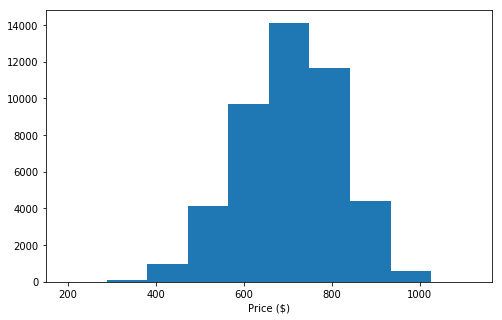

In [22]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Total Score')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

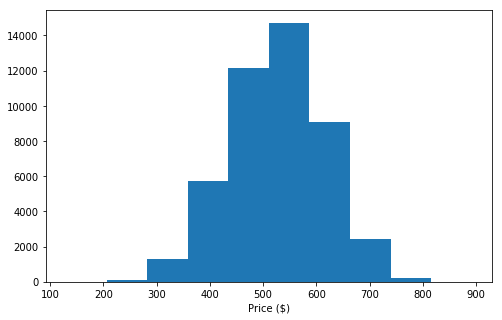

In [23]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Math Score')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

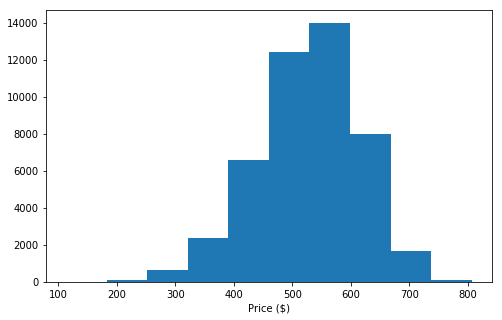

In [24]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Reading Score')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

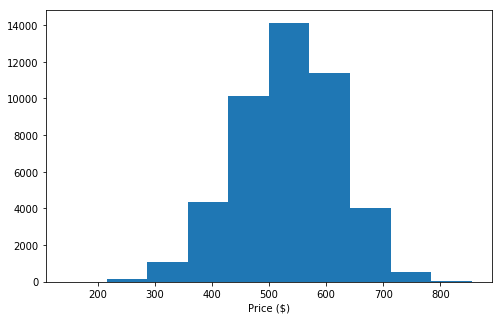

In [25]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Science Score')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

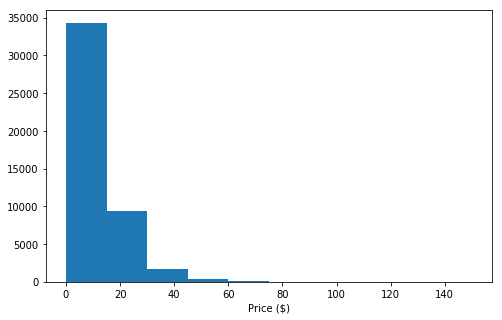

In [26]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

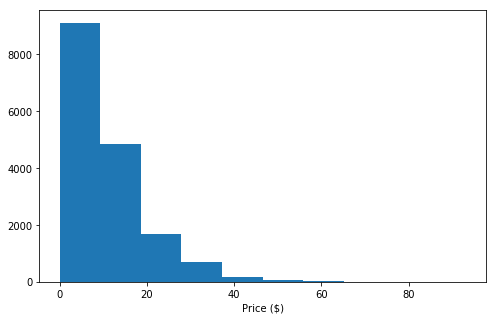

In [27]:
plt.figure(figsize=[8, 5])
plt.hist(data = high_grade, x = 'Out-of-School Study Time - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

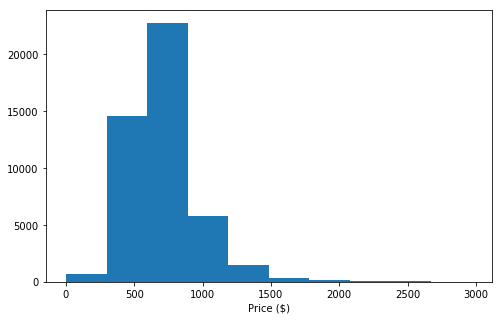

In [28]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning time (minutes per week) - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

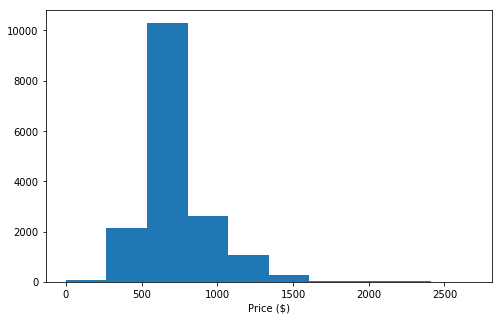

In [29]:
plt.figure(figsize=[8, 5])
plt.hist(data = high_grade, x = 'Learning time (minutes per week) - Total')
plt.xlabel('Price ($)')

In [30]:
pisa

,Student ID,Gender,How many books at home,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning time (minutes per week)- <Mathematics>,Learning time (minutes per week) - <test language>,Learning time (minutes per week) - <Science>,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning time (minutes per week) - Total
0,1647,Male,NaN,2.0,1.0,0.0,0.0,0.0,150.0,200.0,350.0,449.53266,478.18156,474.20738,617.151420,<ISCED level 6>,<ISCED level 0>,3.0,700.0
3536,17595,Female,NaN,2.0,0.0,0.0,3.0,0.0,180.0,225.0,135.0,382.93348,457.04998,424.78552,549.234153,<ISCED level 3>,<ISCED level 2>,5.0,540.0
18086,7742,Male,NaN,5.0,0.0,0.0,0.0,0.0,100.0,200.0,100.0,524.93382,442.09408,477.93734,656.633020,<ISCED level 4>,<ISCED level 3>,5.0,400.0
3538,17702,Male,NaN,2.0,1.0,1.0,1.0,2.0,400.0,400.0,300.0,427.72240,447.14630,432.52516,578.372087,<ISCED level 3>,<ISCED level 2>,7.0,1100.0
18094,25104,Male,NaN,12.0,2.0,2.0,0.0,0.0,240.0,240.0,120.0,528.43902,561.58388,513.09212,710.518013,<ISCED level 5>,<ISCED level 3>,16.0,600.0
3541,17158,Female,NaN,2.0,1.0,0.0,2.0,1.0,300.0,300.0,100.0,354.89172,403.99006,408.00072,507.258073,<ISCED level 3>,<ISCED level 2>,6.0,700.0
3542,12314,Female,NaN,4.0,2.0,0.0,2.0,1.0,200.0,200.0,100.0,426.70976,496.28892,493.04362,614.250687,<ISCED level 3>,<ISCED level 2>,9.0,500.0
3544,12001,Male,NaN,3.0,0.0,0.0,0.0,0.0,300.0,300.0,200.0,450.07788,451.15604,468.79896,606.703587,<ISCED level 3>,<ISCED level 2>,3.0,800.0
18113,28578,Male,NaN,1.0,0.0,0.0,0.0,0.0,250.0,250.0,150.0,547.05562,492.13546,462.45804,682.901580,<ISCED level 5>,<ISCED level 3>,1.0,650.0
18115,22185,Male,NaN,2.0,0.0,0.0,0.0,0.0,220.0,165.0,110.0,453.97258,425.73438,477.56434,603.747960,<ISCED level 4>,<ISCED level 3>,2.0,495.0


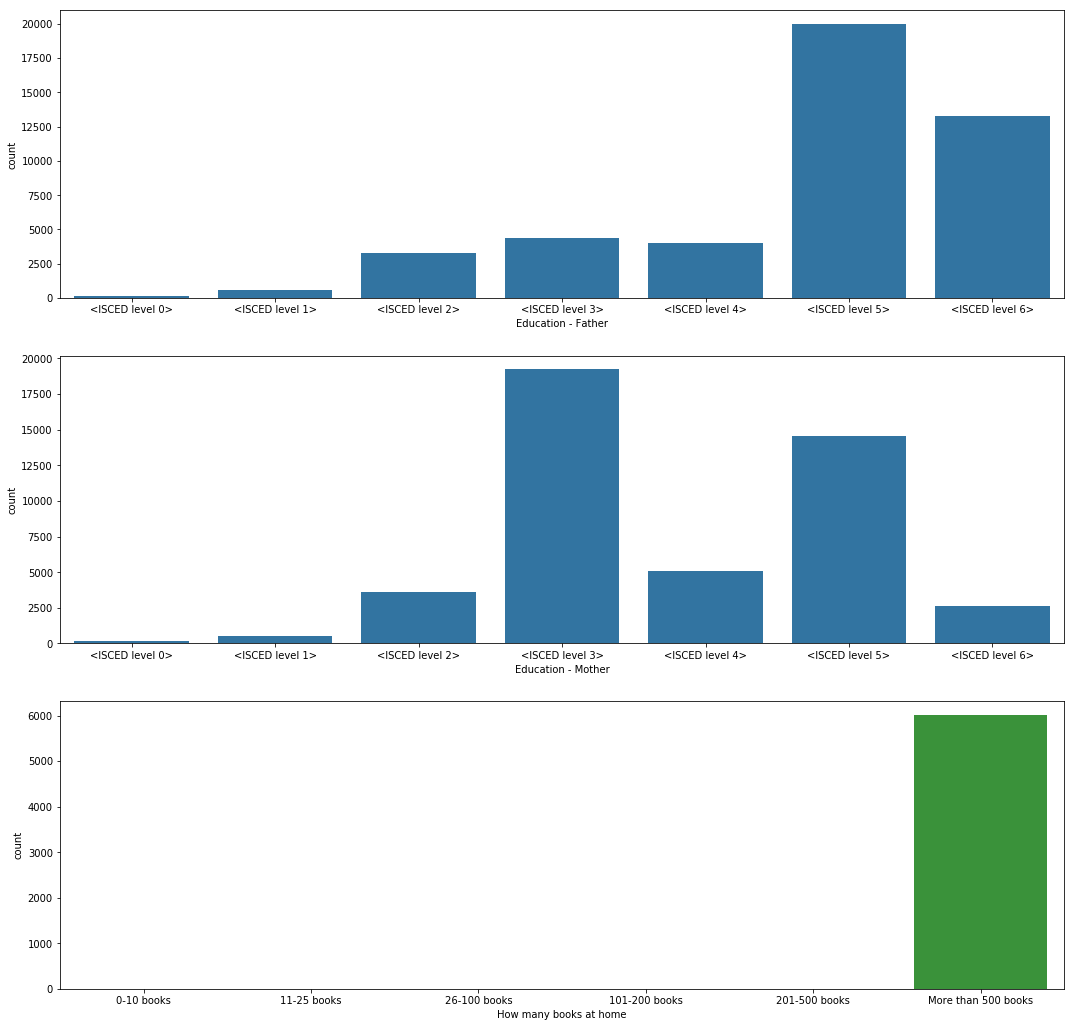

In [31]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [18,18])

default_color = sb.color_palette()[0]
sb.countplot(data = pisa, x = 'Education - Father', color = default_color, ax = ax[0])
sb.countplot(data = pisa, x = 'Education - Mother', color = default_color, ax = ax[1])
sb.countplot(data = pisa, x = 'How many books at home', color = sb.color_palette()[2], ax = ax[2])

plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [32]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 'Average Total Score', 'Out-of-School Study Time - Total', 'Learning time (minutes per week) - Total']


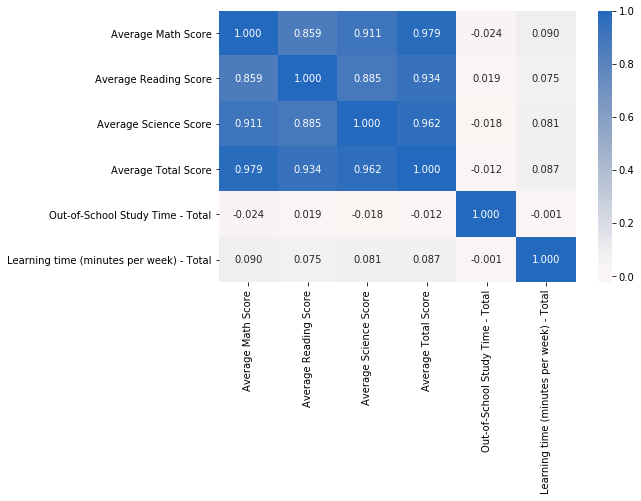

In [33]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [71]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Learning Time - Mathematics',
                'Learning Time - Test Language', 'Learning Time - Science', 
                'Learning Time - Total']


In [68]:
list(pisa)

['Student ID',
 'Gender',
 'How many books at home',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning time (minutes per week)- <Mathematics>',
 'Learning time (minutes per week)  - <test language>',
 'Learning time (minutes per week) - <Science>',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning time (minutes per week) - Total']

In [72]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(high_grade[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

KeyError: "['Learning time (minutes per week) - <Mathematics>', 'Learning time (minutes per week) - <test language>'] not in index"

<Figure size 576x360 with 0 Axes>

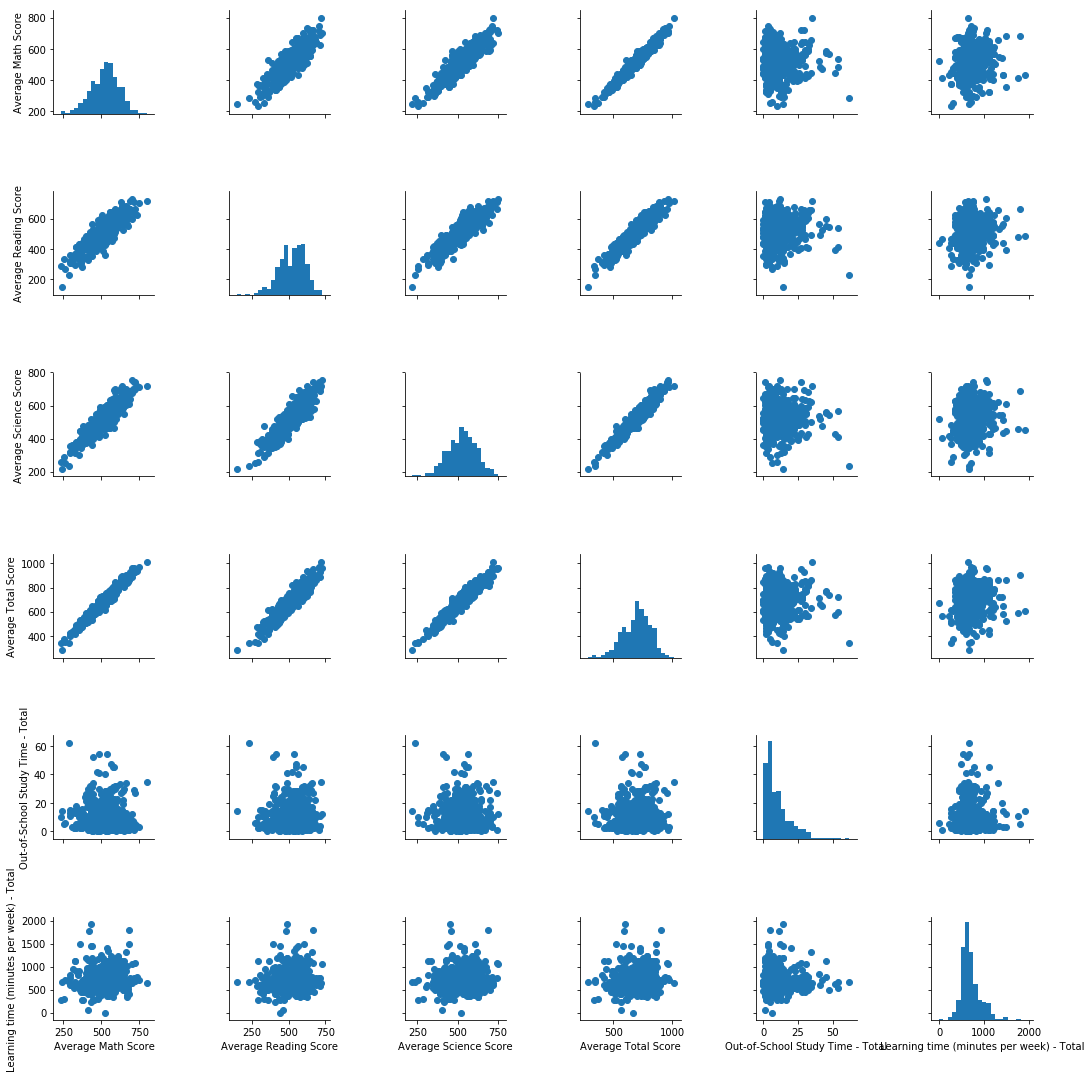

In [35]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [36]:
homework_vars = ['Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent',
                      'Learning time (minutes per week)- <Mathematics>',
                      'Learning time (minutes per week)  - <test language>',
                      'Learning time (minutes per week) - <Science>']

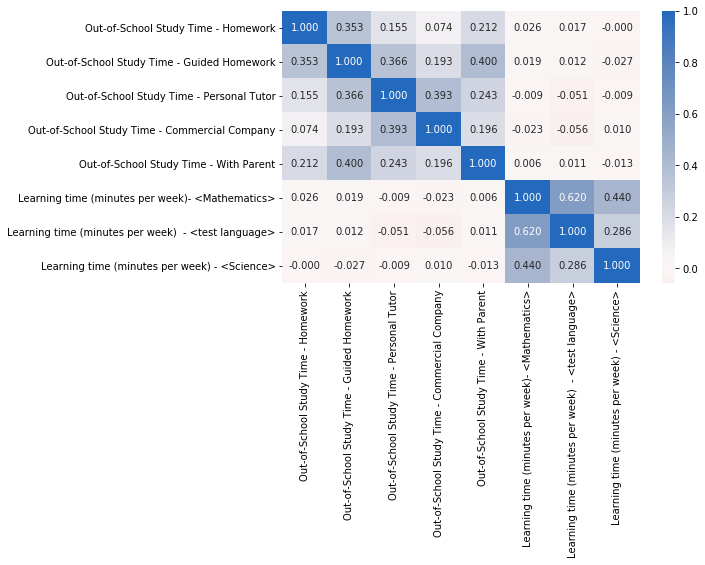

In [37]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[homework_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

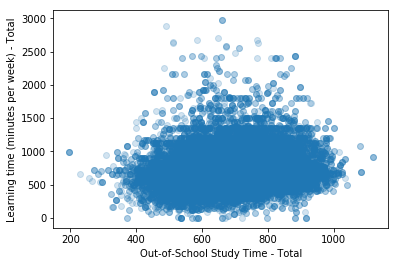

In [38]:
sb.regplot(data= pisa, x = 'Average Total Score', 
           y = 'Learning time (minutes per week) - Total', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

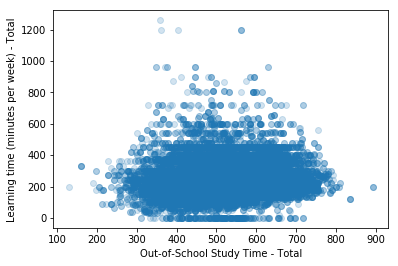

In [39]:
sb.regplot(data= pisa, x = 'Average Math Score', 
           y = 'Learning time (minutes per week)- <Mathematics>', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

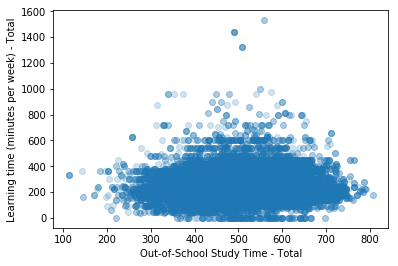

In [40]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Learning time (minutes per week)  - <test language>', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

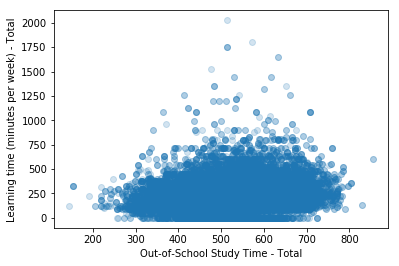

In [41]:
sb.regplot(data= pisa, x = 'Average Science Score', 
           y = 'Learning time (minutes per week) - <Science>', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

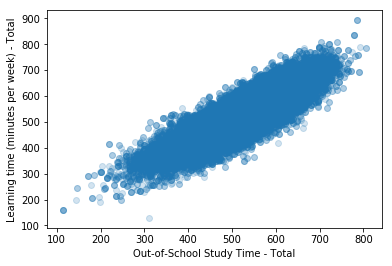

In [42]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Average Math Score', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

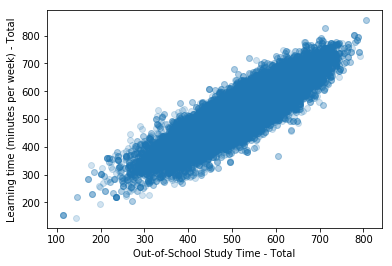

In [43]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Average Science Score', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

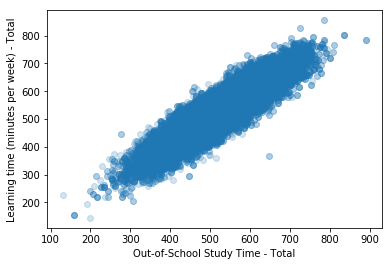

In [44]:
sb.regplot(data= pisa, x = 'Average Math Score', 
           y = 'Average Science Score', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

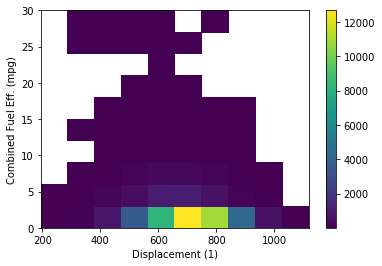

In [45]:
plt.hist2d(data = pisa, x = 'Average Total Score', 
           y = 'Out-of-School Study Time - Personal Tutor', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

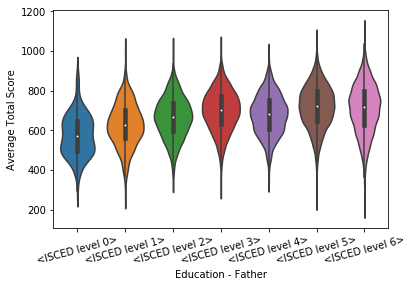

In [46]:
sb.violinplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

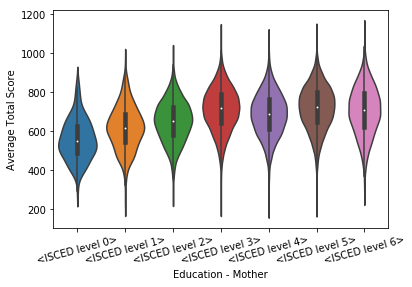

In [47]:
sb.violinplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

In [48]:
list(pisa)

['Student ID',
 'Gender',
 'How many books at home',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning time (minutes per week)- <Mathematics>',
 'Learning time (minutes per week)  - <test language>',
 'Learning time (minutes per week) - <Science>',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning time (minutes per week) - Total']

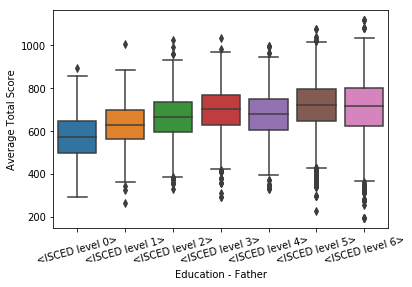

In [49]:
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

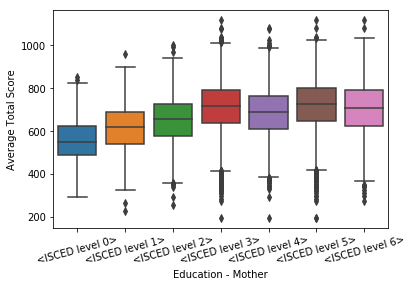

In [50]:
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

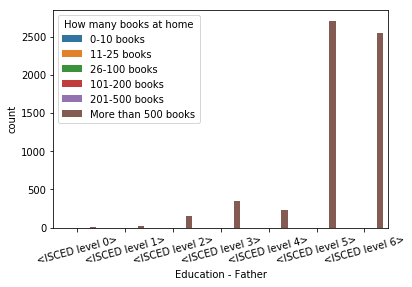

In [51]:
sb.countplot(data = pisa, x = 'Education - Father', hue = 'How many books at home')
plt.xticks(rotation = 15);

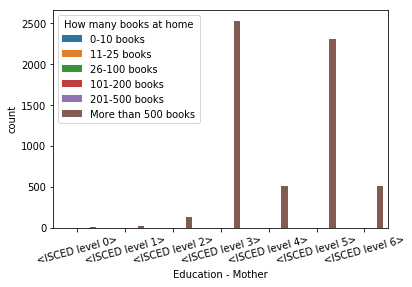

In [52]:
sb.countplot(data = pisa, x = 'Education - Mother', hue = 'How many books at home')
plt.xticks(rotation = 15);

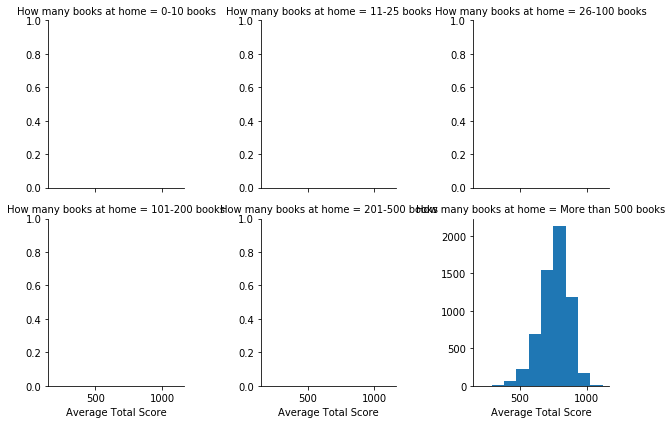

In [53]:
# fix y axis
g = sb.FacetGrid(data = pisa, col = 'How many books at home', col_wrap = 3, sharey = False);
g.map(plt.hist, 'Average Total Score');

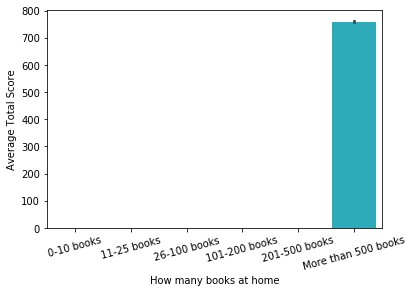

In [54]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
              x = 'How many books at home', 
              y = 'Average Total Score',
              color = base_color);
plt.xticks(rotation = 15);

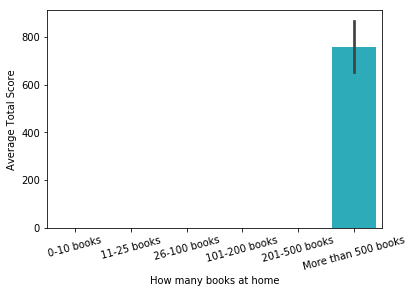

In [55]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
           x = 'How many books at home', 
           y = 'Average Total Score',
           color = base_color,
           ci = 'sd')
plt.xticks(rotation = 15);

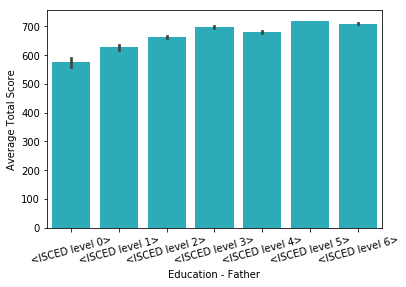

In [56]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = base_color);
plt.xticks(rotation = 15);

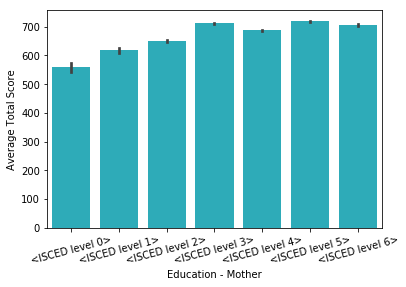

In [57]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = base_color);
plt.xticks(rotation = 15);

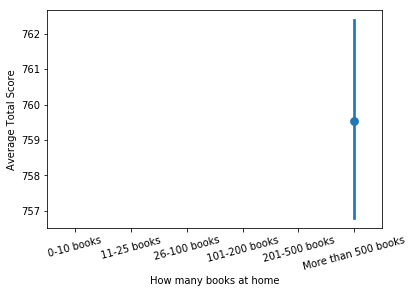

In [58]:
sb.pointplot(data = pisa, 
              x = 'How many books at home', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

In [59]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

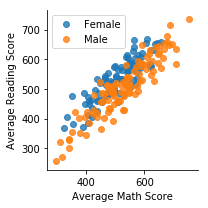

In [60]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Math Score', 'Average Reading Score', fit_reg = False)
plt.legend();

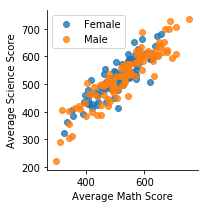

In [61]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Math Score', 'Average Science Score', fit_reg = False)
plt.legend();

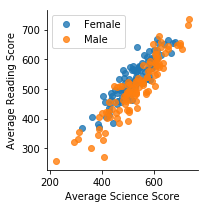

In [62]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Science Score', 'Average Reading Score', fit_reg = False)
plt.legend();

In [63]:
list(pisa)

['Student ID',
 'Gender',
 'How many books at home',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning time (minutes per week)- <Mathematics>',
 'Learning time (minutes per week)  - <test language>',
 'Learning time (minutes per week) - <Science>',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning time (minutes per week) - Total']

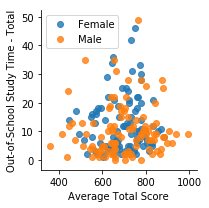

In [64]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Total', fit_reg = False)
plt.legend();

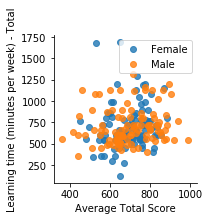

In [65]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Total Score', 'Learning time (minutes per week) - Total', fit_reg = False)
plt.legend();

In [66]:
pisa.loc[pisa['Learning time (minutes per week) - Total'] >= 2900]

,Student ID,Gender,How many books at home,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning time (minutes per week)- <Mathematics>,Learning time (minutes per week) - <test language>,Learning time (minutes per week) - <Science>,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning time (minutes per week) - Total
41342,7677,Female,NaN,4.0,1.0,0.0,0.0,1.0,900.0,315.0,1755.0,487.15534,495.9712,513.46514,661.249007,<ISCED level 4>,<ISCED level 5>,6.0,2970.0
27369,7677,Female,NaN,4.0,1.0,0.0,0.0,1.0,900.0,315.0,1755.0,487.15534,495.9712,513.46514,661.249007,<ISCED level 4>,<ISCED level 4>,6.0,2970.0
4845,7677,Female,NaN,4.0,1.0,0.0,0.0,1.0,900.0,315.0,1755.0,487.15534,495.9712,513.46514,661.249007,<ISCED level 4>,<ISCED level 3>,6.0,2970.0


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = International Grade.

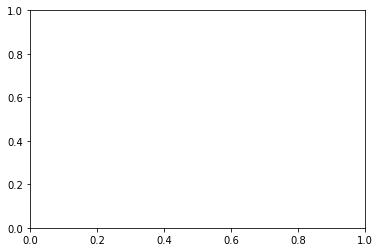

In [67]:
plt.scatter(data = pisa, 
            y = 'Learning time (minutes per week) - Total',
            x = 'Average Total Score',
            c = 'International Grade')
plt.colorbar();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
list(pisa)

In [ ]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

In [ ]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Education - Father')
g.map(sb.regplot, 'Average Total Score', 'Average Math Score',  x_jitter = 0.04, fit_reg = False)
plt.legend()
plt.ylabel('Combined Fuel Eff. (mpg)');

In [ ]:
plt.figure(figsize = [8,6])
plt.scatter(data = pisa, 
            y = 'Average Math Score',
            x = 'Average Reading Score',
            c = 'Average Total Score')
# plt.xlim(0, 160)
# plt.ylim(15, 160)
plt.colorbar(label = 'Speed')
plt.xlabel('Defense')
plt.ylabel('Special Defense');

In [ ]:
pisa['Gender'].value_counts()

In [ ]:
list(pisa)

In [ ]:
pisa_sub = pisa.loc[pisa['Gender'].isin(['Male', 'Female'])]

sb.boxplot(data = pisa_sub, 
              x = 'Average Science Score', 
              y = 'Learning time (minutes per week) - <Science>',
             hue = 'Gender');
plt.xticks(rotation = 15);
plt.ylabel('Displacement (1)')
plt.xlabel('Vehicle Class')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!